## This is a little fun project about the some fellows in Insight Data Science program
The data was scraped from Insight Data Science website

In [1]:
from bs4 import BeautifulSoup
import urllib
import re
from itertools import chain
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
class InsightFellows(object):
    
    def __init__(self, df, link, categories, n_pages=8):
        self.df = df
        self.link = link
        self.categories = categories
        self.n_pages = n_pages
        self.scrape_info()
        
    def scrape_info(self):
        for j in range(len(self.categories)):
            name = self.categories[j]
            class_ = re.compile("tooltip_{0}".format(name))
            lists = []
            for i in range(1, self.n_pages+1):
                url = self.link + str(i)
                uh = urllib.request.urlopen(url)
                soup = BeautifulSoup(uh, 'html.parser')
                soup = soup.find_all('div', class_=class_)
                item_list = [info.text for info in soup]
                lists.append(item_list)
            items = [item for item in chain(*lists)]
            df_series = pd.Series(items, name=name)
            self.df = pd.concat([self.df, df_series], axis=1)
        return self.df
    
    def search_companies(self, company):
        return self.df[self.df['company'] == company]
    
def main():
    print('Please input your desired company name: ')
    company = input()
    return data_fellow.search_companies(company)

def get_project_texts(fellows, category):
    texts = [text.split(':')[-1] for text in fellows.df[category]]
    all_texts = ''
    for txt in texts:
        all_texts = all_texts + ' ' + txt
    return all_texts

def plot_words(txts):
    stop_words = stopwords.words('english')
    wc = WordCloud(background_color='white', 
                   max_words=2000, stopwords=stop_words)
    wc.generate(str(txts))
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
link = 'https://www.insightdatascience.com/fellows?e9e38a35_page='
categories = ['name', 'background', 'project', 'company']
df = pd.DataFrame()
data_fellow = InsightFellows(df, link, categories)

In [5]:
data_fellow.df.to_csv('../data/insight_data_science_fellow.csv')

In [6]:
main()

Please input your desired company name: 


 LinkedIn


,name,background,project,company
4,David Freeman,"Mathematics, Stanford, Postdoc",Flight Delay Predictor,LinkedIn
5,Jessica Zúñiga,"Mathematics, Duke, Postdoc",Email Contacts Automatically Grouped & Ranked,LinkedIn
12,Leah McGuire,"Computational Neuroscience, UC Berkeley, Postdoc",Kiva Loan Checker,LinkedIn
15,Onkar Dalal,"Computational & Mathematical Engineering, Stan...",Diverse Recipe Recommendations,LinkedIn
16,Aastha Jain,"Computer Vision & Image Processing, Johns Hopk...",Multi-Domain Recommendations,LinkedIn
52,Jingjing Huang,"Mathematics/Electrical Engineering, California...",NuTube: Classifying recent YouTube videos,LinkedIn
55,Jenelle Bray,Computational Structural Biology <br> Stanford...,PlacePickr: Helping couples decide where to live,LinkedIn
88,Natalie Han,"Medical Image Analysis, Stanford, Postdoc",DJ-Cloud: Discover popular music albums with c...,LinkedIn
135,Yiping Yuan,"Statistics, University of Minnesota, PhD",Career Wizard: A career path recommender,LinkedIn
157,Grace Tang,"Bioinformatics, Stanford, PhD",tripsift: TripAdvisor made simple - so you don...,LinkedIn


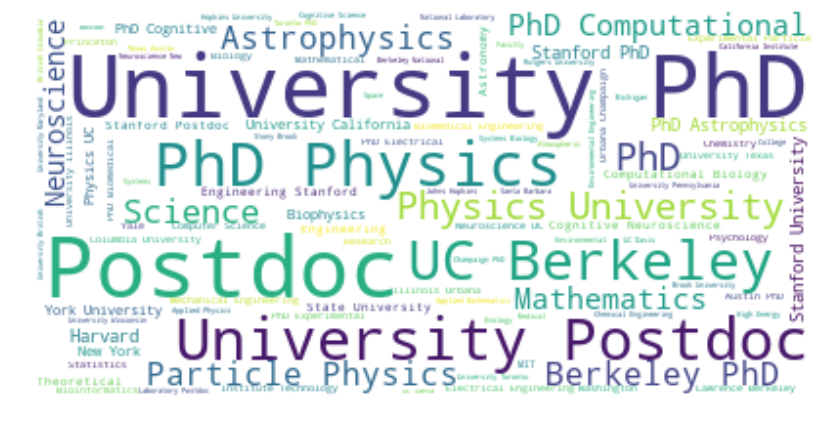

In [135]:
plot_words(get_project_texts(data_fellow, 'background'))

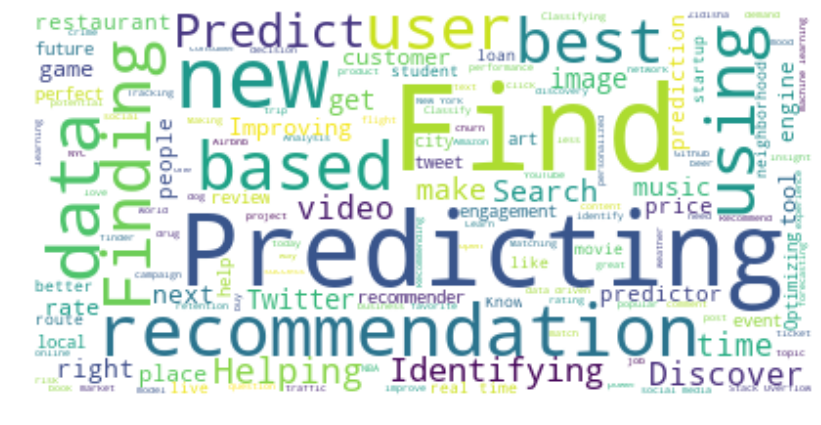

In [136]:
plot_words(get_project_texts(data_fellow, 'project'))

In [133]:
data_fellow.df

,name,background,project,company
0,JP Bida,"Bio-X Games, Stanford, Postdoc",Measuring the Impact of Open Source Coders on ...,Capital One
1,Douglas Mason,"Physics, Harvard University, PhD\n",Email Searcher: Search & Visualize Your Mailbox,Twitter
2,Virot Ta Chiraphadhanakul,"Operations Research, MIT, PhD",Tweet Timeline: Visualizing the Impact of Soci...,Facebook
3,Julia Viladomat,"Statistics, Stanford, Postdoc",Sentiment Analysis Based on Social Media,Adobe
4,David Freeman,"Mathematics, Stanford, Postdoc",Flight Delay Predictor,LinkedIn
...,...,...,...,...
789,Samta Shukla,"Computer Systems, Rensselaer Polytechnic, PhD",SaReGaMood: Mood-based playlists for Indian cl...,CVS Health
790,Yossi Cohen,"Theoretical Physics, Weizmann Institute, PhD",Flightstitute: Risk management for flight disr...,Wellington
791,Pawan Nandakishore,"Fracture Mechanics, Max Planck Institute for D...",Joke's on you!: Identifying humor and inapprop...,Colaberry
792,Margaret Kosmala,"Ecology, University of Minnesota, PhD",Mountain Bike Forecast: Predicting riding cond...,CiBO


In [5]:
companies = ['Apple', 'Google', 'Facebook', 'Microsoft', 'Netflix', 'Twitter', 
             'LinkedIn', 'Square', 'Capital One', 'Airbnb', 'Bloomberg', 'Amazon',
             'IBM', 'Yelp', 'Gartner', 'Uber', 'Intuit', 'Nielsen']

df_companies = pd.DataFrame()
for company in companies:
    df_temp = data_fellow.search_companies(company)
    df_companies = pd.concat([df_companies, df_temp], axis=0)

In [26]:
df_companies['company'].value_counts()

Facebook       54
LinkedIn       21
Netflix        15
Intuit         14
Uber           12
Yelp           12
Gartner        12
Square         10
Apple           9
Capital One     9
Google          9
Airbnb          9
Twitter         8
IBM             8
Nielsen         6
Bloomberg       5
Amazon          5
Microsoft       4
Name: company, dtype: int64

In [533]:
size = df_companies['company'].value_counts()/(data_fellow.df.shape[0]/100)
df_companies.shape[0]/data_fellow.df.shape[0]*100

27.95969773299748

In [536]:
main()

Please input your desired company name: 


 Capital One


,name,background,project,company
0,JP Bida,"Bio-X Games, Stanford, Postdoc",Measuring the Impact of Open Source Coders on ...,Capital One
99,Jesus Martinez,"Astrophysics, University of Florida, PhD",EdXPredictor: Predict your performance on edX ...,Capital One
130,Robert Amanfu,"Biomedical Engineering, University of Virginia...",CraigFlagr: Check flag potential of Craigslist...,Capital One
158,Geoff Svacha,"Policy Analysis, Pardee RAND Graduate School, PhD",Improving power management of Lockitron,Capital One
173,Evan Bloom,"Policy Analysis, Pardee RAND Graduate School, PhD",Price My Ticket: Smartly selling your SF Giant...,Capital One
365,Daniel Jumper,"Experimental Particle Physics, University of I...",Forecast My City: A city economic predictor,Capital One
510,Ivan Teo,"Physics, University of Illinois at Urbana-Cham...",ClassCorrect: Fixing classification errors,Capital One
522,Matthew Dornfeld,"Physics, Rockefeller University, PhD",Busy Cab: An app to help yellow cab drivers pi...,Capital One
593,Katie Schlesinger,"Astrophysics, Australian National University, ...",CleanStreet,Capital One


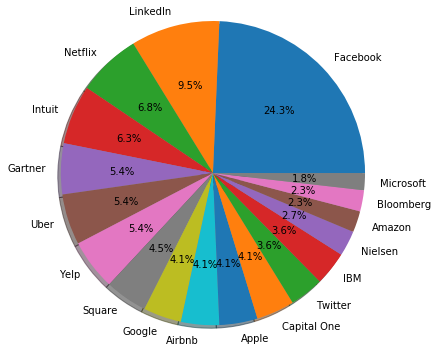

In [531]:
fg, ax = plt.subplots(figsize=(6, 6))
ax.pie(size, labels = size.index, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

In [523]:
size.index

Index(['Facebook', 'LinkedIn', 'Netflix', 'Intuit', 'Gartner', 'Uber', 'Yelp',
       'Square', 'Google', 'Airbnb', 'Apple', 'Capital One', 'Twitter', 'IBM',
       'Nielsen', 'Amazon', 'Bloomberg', 'Microsoft'],
      dtype='object')

## Scraping the PSL

In [57]:
from bs4 import BeautifulSoup
import urllib
import re

In [81]:
link = 'https://www.psl.com/companies'

uh = urllib.request.urlopen(link)
soup = BeautifulSoup(uh, 'html.parser')

In [67]:
contents = soup.find_all('a', class_ ="companies-item-link w-inline-block")
companies = [content.get('href').split('/')[-1] for content in contents]

In [80]:
company_names = []
for company in companies:
    if company in company_names:
        continue
    else:
        company_names.append(company)

In [84]:
psl_company_links = []
for company_name in company_names:
    new_link = link + '/' + company_name
    uh = urllib.request.urlopen(new_link)
    soup = BeautifulSoup(uh, 'html.parser')
    for psl_link in soup.find_all('a', class_="company-metadata-link p-large"):
        psl_company_links.append(psl_link.get('href'))

In [85]:
psl_company_links

['https://www.adlightning.com/',
 'https://www.attunely.com/',
 'https://www.bigboxvr.com/',
 'https://boundless.com/',
 'http://canotic.com',
 'https://www.gemmahaircare.com/',
 'https://www.glow.fm/',
 'https://www.gradient.io/',
 'http://insponetwork.com/',
 'http://jetclosing.com',
 'https://lumatax.com/',
 'http://nextstep.careers/',
 'https://www.remarkably.io/',
 'https://www.sentinel.healthcare/',
 'https://www.shipium.com/',
 'http://www.shujinko.io',
 'http://sigmaiq.com/',
 'https://www.singlefile.co/',
 'http://playtally.com',
 'https://www.playtaunt.com/']